<a href="https://colab.research.google.com/github/Alan1s/AlzheimerClasification/blob/main/analisis_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [56]:
df = pd.read_csv('/content/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')

<ipython-input-56-b1ca8a9338c5>:1: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')


In [57]:
print(df.head())

                                        RowId  YearStart  YearEnd  \
0  BRFSS~2015~2015~9001~Q27~TMC03~AGE~OVERALL       2015     2015   
1   BRFSS~2016~2016~9001~Q03~TMC01~AGE~GENDER       2016     2016   
2  BRFSS~2020~2020~9004~Q03~TMC01~AGE~OVERALL       2020     2020   
3   BRFSS~2015~2015~9004~Q43~TOC11~AGE~GENDER       2015     2015   
4     BRFSS~2018~2018~9001~Q03~TMC01~AGE~RACE       2018     2018   

  LocationAbbr LocationDesc Datasource           Class  \
0          NRE    Northeast      BRFSS   Mental Health   
1          NRE    Northeast      BRFSS   Mental Health   
2         WEST         West      BRFSS   Mental Health   
3         WEST         West      BRFSS  Overall Health   
4          NRE    Northeast      BRFSS   Mental Health   

                              Topic  \
0  Lifetime diagnosis of depression   
1          Frequent mental distress   
2          Frequent mental distress   
3      Arthritis among older adults   
4          Frequent mental distress   

 

In [58]:
# Para columnas numéricas
print(df.describe())

# Para columnas categóricas
for column in df.select_dtypes(include=['object', 'category']).columns:
    print(f"Valores únicos en la columna {column}:")
    print(df[column].value_counts())
    print("\n")

           YearStart        YearEnd     Data_Value  Data_Value_Alt  \
count  250937.000000  250937.000000  169302.000000   169302.000000   
mean     2017.940933    2018.169716      37.328349       37.328349   
std         2.031564       2.081039      25.213181       25.213181   
min      2015.000000    2015.000000       0.000000        0.000000   
25%      2016.000000    2016.000000      15.700000       15.700000   
50%      2018.000000    2018.000000      32.300000       32.300000   
75%      2020.000000    2020.000000      56.000000       56.000000   
max      2021.000000    2021.000000     100.000000      100.000000   

          LocationID  
count  250937.000000  
mean      793.866437  
std      2502.174327  
min         1.000000  
25%        19.000000  
50%        34.000000  
75%        49.000000  
max      9004.000000  
Valores únicos en la columna RowId:
RowId
BRFSS~2016~2021~12~Q40~TGC05~AGE~RACE       15
BRFSS~2015~2015~04~Q31~TCC02~AGE~RACE       15
BRFSS~2017~2017~34~Q03~TMC

In [59]:
print(df.dtypes)

RowId                          object
YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Data_Value_Unit                object
DataValueTypeID                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit           object
High_Confidence_Limit          object
StratificationCategory1        object
Stratification1                object
StratificationCategory2        object
Stratification2                object
Geolocation                    object
ClassID                        object
TopicID                        object
QuestionID                     object
LocationID  

Tengo que revisar si esta bien que sea ese tipo de dato

In [60]:
# Extraer caracteres no numéricos
non_numeric_chars = df['Low_Confidence_Limit'].str.extract('([^0-9.-])')[0].dropna().unique()

# Imprimir los caracteres no numéricos encontrados
print(non_numeric_chars)

[]


In [61]:
df['Low_Confidence_Limit'] = df['Low_Confidence_Limit'].str.replace(',', '')
df['Low_Confidence_Limit'] = pd.to_numeric(df['Low_Confidence_Limit'], errors='coerce')

# Realizar el mismo proceso para 'High_Confidence_Limit'
df['High_Confidence_Limit'] = df['High_Confidence_Limit'].str.replace(',', '')
df['High_Confidence_Limit'] = pd.to_numeric(df['High_Confidence_Limit'], errors='coerce')

In [62]:
print(df.dtypes)


RowId                          object
YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Data_Value_Unit                object
DataValueTypeID                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
StratificationCategory1        object
Stratification1                object
StratificationCategory2        object
Stratification2                object
Geolocation                    object
ClassID                        object
TopicID                        object
QuestionID                     object
LocationID  

In [63]:
print(df.describe())

           YearStart        YearEnd     Data_Value  Data_Value_Alt  \
count  250937.000000  250937.000000  169302.000000   169302.000000   
mean     2017.940933    2018.169716      37.328349       37.328349   
std         2.031564       2.081039      25.213181       25.213181   
min      2015.000000    2015.000000       0.000000        0.000000   
25%      2016.000000    2016.000000      15.700000       15.700000   
50%      2018.000000    2018.000000      32.300000       32.300000   
75%      2020.000000    2020.000000      56.000000       56.000000   
max      2021.000000    2021.000000     100.000000      100.000000   

       Low_Confidence_Limit  High_Confidence_Limit     LocationID  
count         131527.000000          131527.000000  250937.000000  
mean              32.654399              42.230696     793.866437  
std               24.279143              26.150109    2502.174327  
min               -0.700000               1.400000       1.000000  
25%               12.400000  

In [64]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       250937 non-null  object 
 1   YearStart                   250937 non-null  int64  
 2   YearEnd                     250937 non-null  int64  
 3   LocationAbbr                250937 non-null  object 
 4   LocationDesc                250937 non-null  object 
 5   Datasource                  250937 non-null  object 
 6   Class                       250937 non-null  object 
 7   Topic                       250937 non-null  object 
 8   Question                    250937 non-null  object 
 9   Data_Value_Unit             250937 non-null  object 
 10  DataValueTypeID             250937 non-null  object 
 11  Data_Value_Type             250937 non-null  object 
 12  Data_Value                  169302 non-null  float64
 13  Data_Value_Alt

In [65]:
print(df.isnull().sum())

RowId                              0
YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
Datasource                         0
Class                              0
Topic                              0
Question                           0
Data_Value_Unit                    0
DataValueTypeID                    0
Data_Value_Type                    0
Data_Value                     81635
Data_Value_Alt                 81635
Data_Value_Footnote_Symbol    151823
Data_Value_Footnote           151823
Low_Confidence_Limit          119410
High_Confidence_Limit         119410
StratificationCategory1            0
Stratification1                    0
StratificationCategory2        32376
Stratification2                32376
Geolocation                    26709
ClassID                            0
TopicID                            0
QuestionID                         0
LocationID                         0
S

In [66]:
%matplotlib inline
sns.set(style="whitegrid")

**Tamaño del conjunto de datos**

In [67]:
tamaño = df.shape
print(f"El conjunto de datos tiene {tamaño[0]} filas y {tamaño[1]} columnas.")

El conjunto de datos tiene 250937 filas y 31 columnas.


**Datos faltantes**

In [68]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Data_Value                     81635
Data_Value_Alt                 81635
Data_Value_Footnote_Symbol    151823
Data_Value_Footnote           151823
Low_Confidence_Limit          119410
High_Confidence_Limit         119410
StratificationCategory2        32376
Stratification2                32376
Geolocation                    26709
dtype: int64


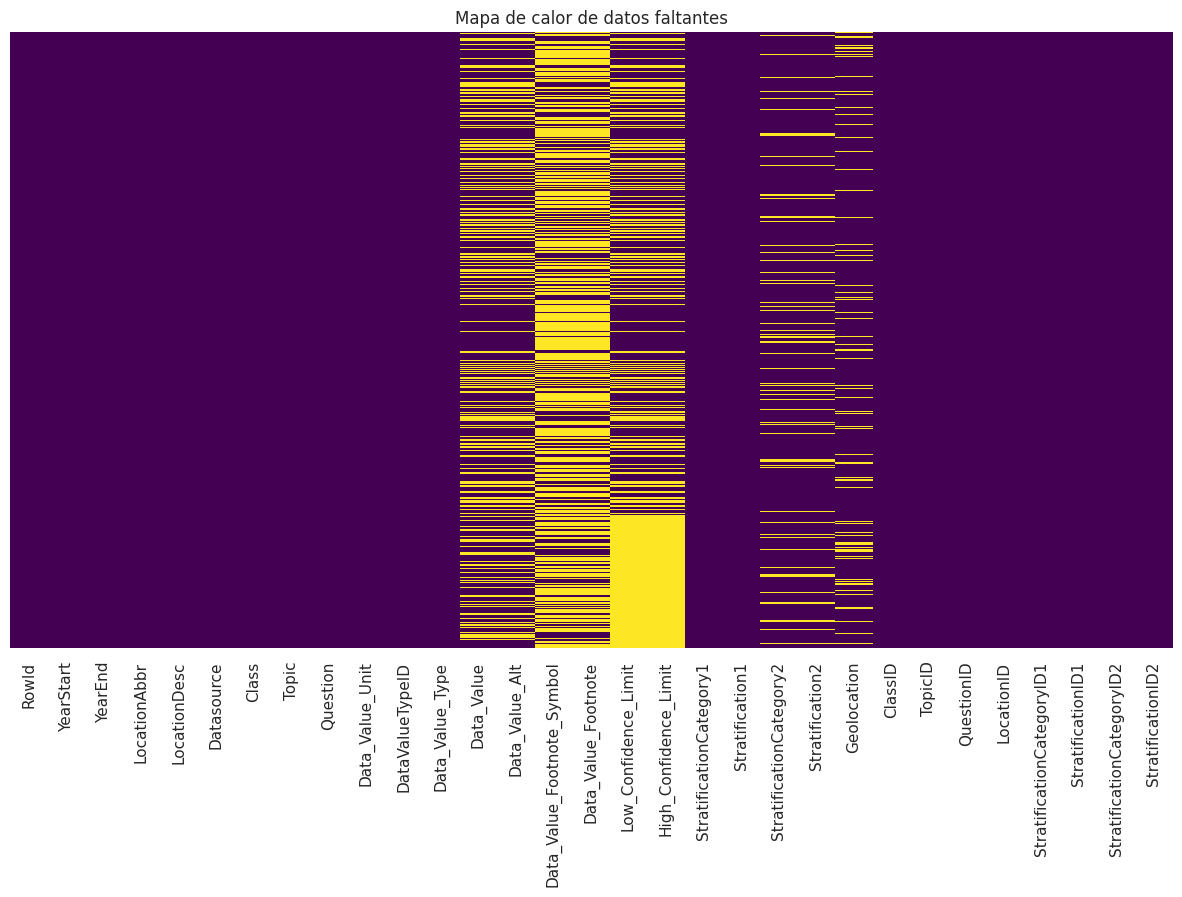

In [69]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mapa de calor de datos faltantes')
plt.show()

In [70]:
# Para imputar con la media o la mediana en columnas numéricas
for column in df.columns:
    if df[column].isnull().any():
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            df[column].fillna(df[column].median(), inplace=True)  # o .mean()

# Para imputar con la moda en columnas categóricas
for column in df.columns:
    if df[column].isnull().any():
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)

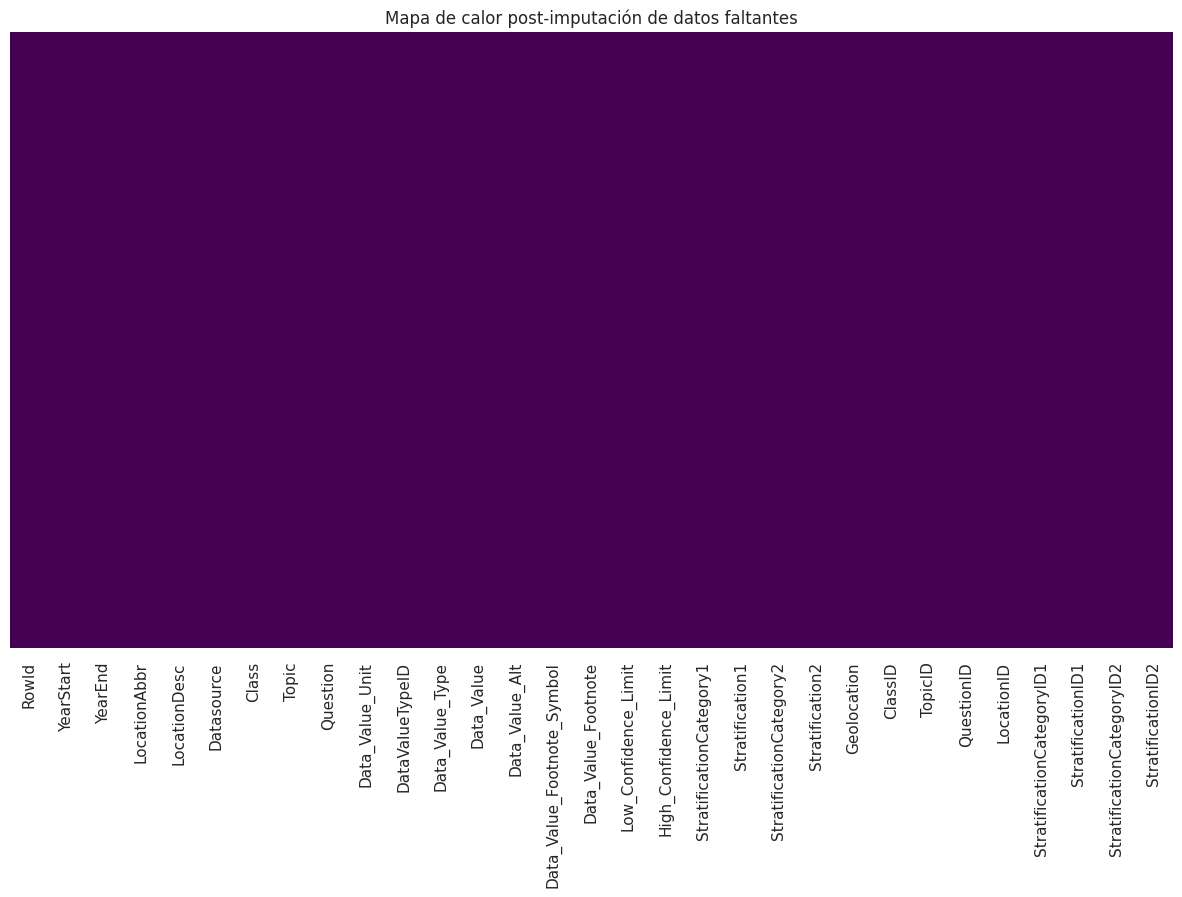

In [71]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mapa de calor post-imputación de datos faltantes')
plt.show()

**PASO UNO**
*Estrategia*

Imaginemonos que tenemos un album de fotos, y sucedio que se nos perdieron una cierta cantidad de fotos, pero como no queremos dejar esos huecos, lo que se hizo fue dibujar por medio caracteristicas la fotos que faltaban, entonces, en nuestro caso para los datos numericos nos pusimos a rellenar un valor faltante con la mediana o la media de los demás valores de esa columna. Y para los datos no numericos, es como tomar la moda, que es el valor que aparece más veces en una columna, y usarlo para llenar los espacios en blanco.

**Estadistico Descriptivo**

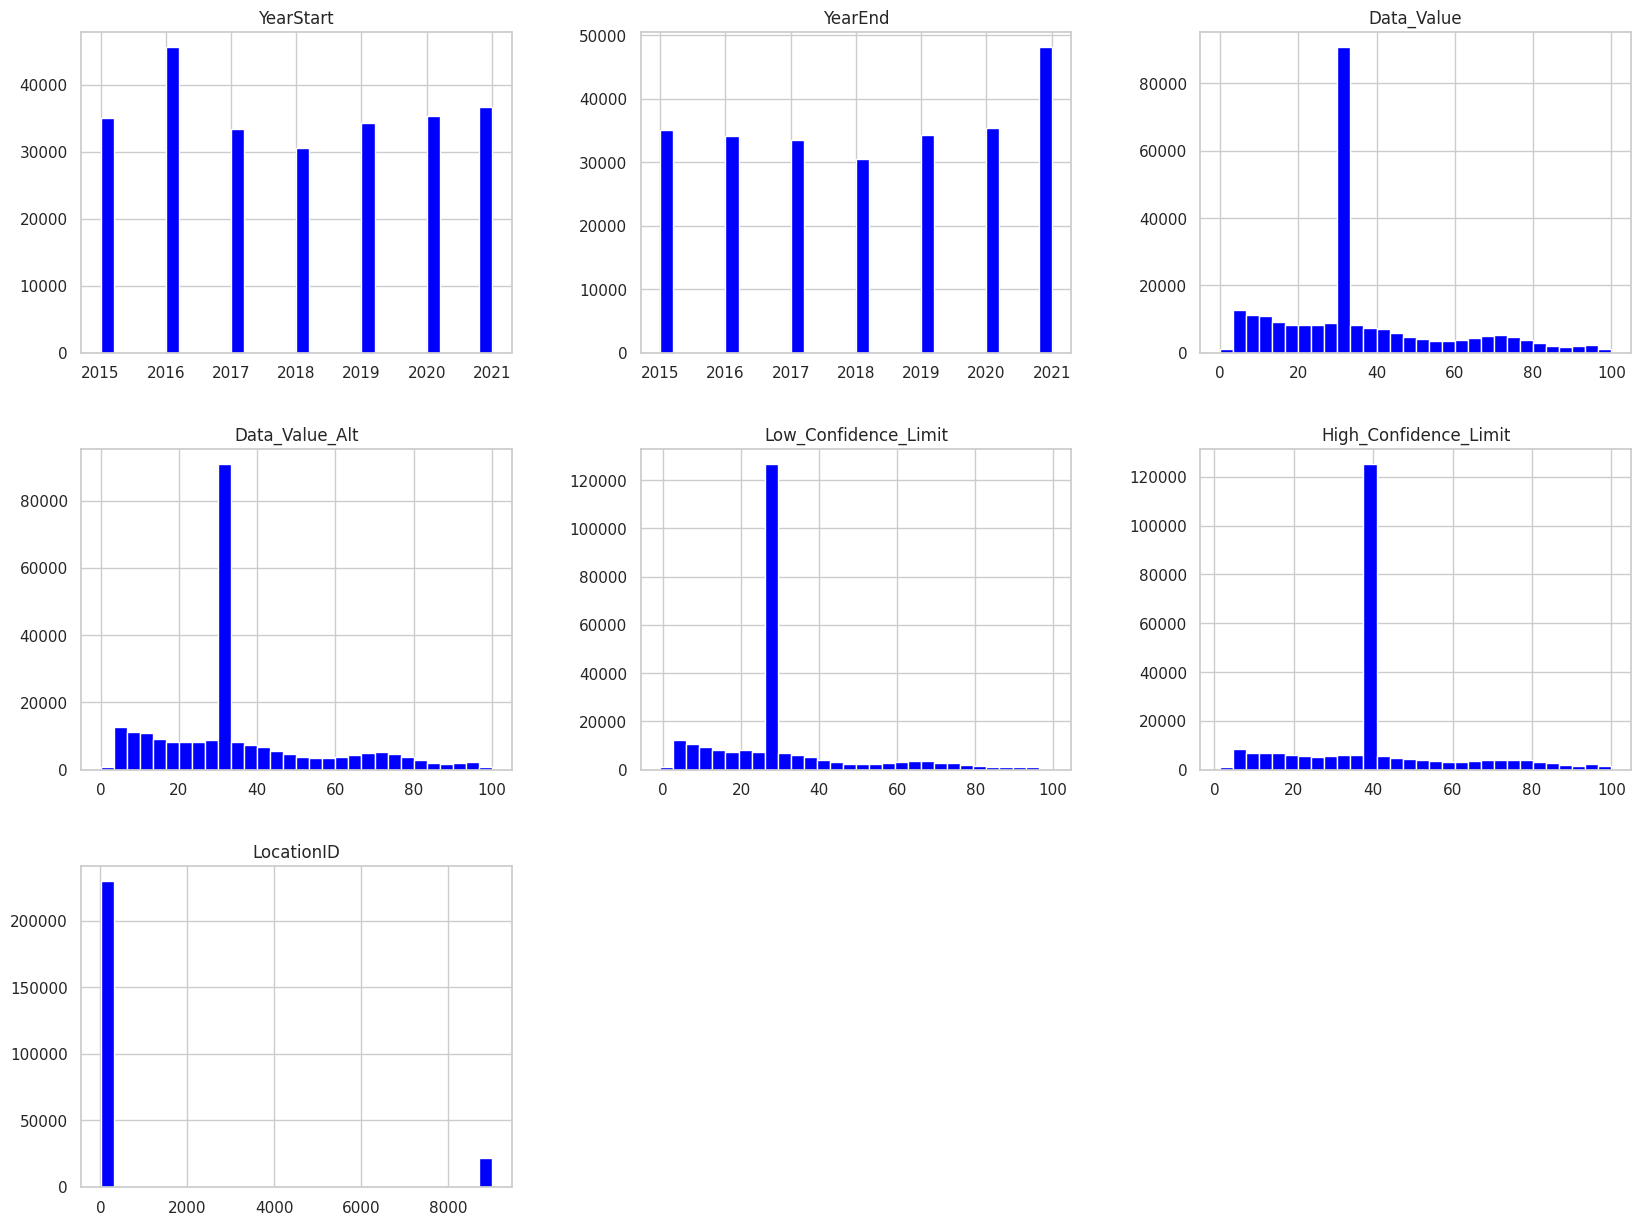

In [72]:
df.hist(bins=30, figsize=(20, 15), color='blue')
plt.show()

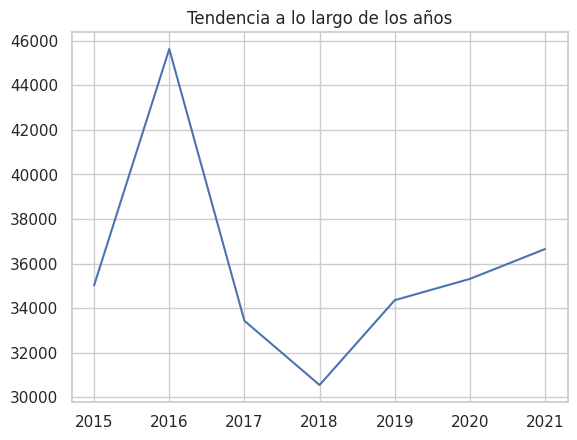

In [73]:
# hay más interés en algo en ciertos años o si algo está mejorando o empeorando con el tiempo.
plt.plot(df.groupby('YearStart').size())
plt.title('Tendencia a lo largo de los años')
plt.show()

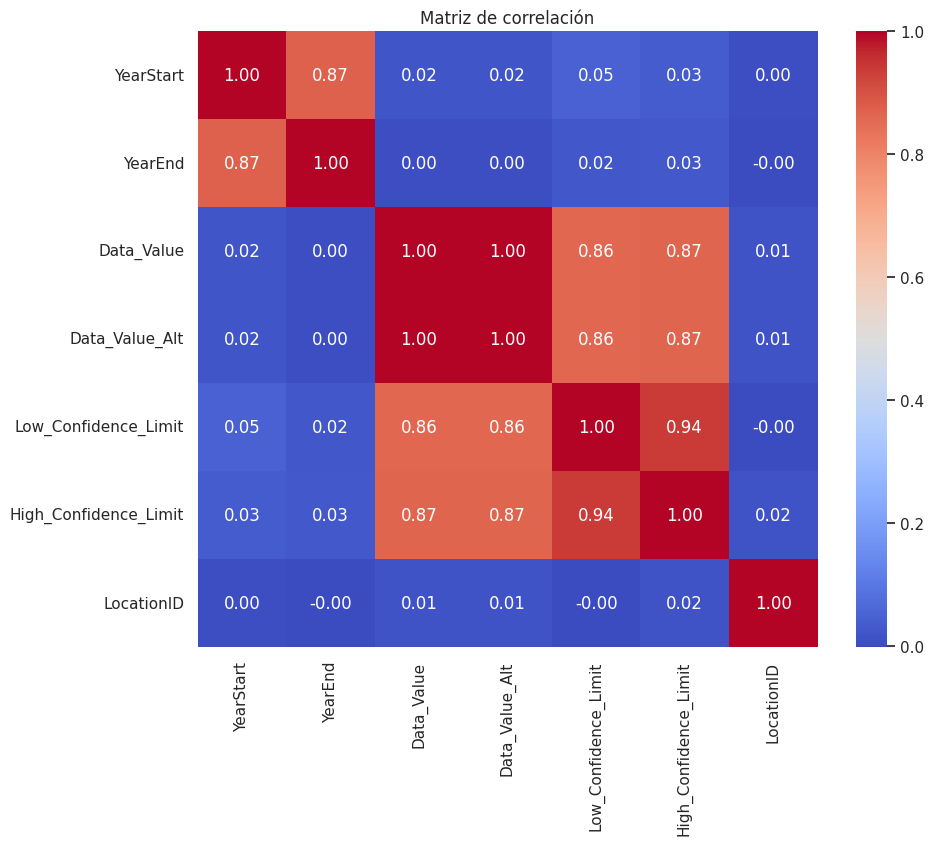

In [74]:

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


**Correlacion**
"Data_Value" y "Data_Value_Alt" son idénticos, con un número de 1.00, por lo que son la pareja perfecta, ¡son iguales! Y "LocationID" parece no parecerse mucho a ninguna otra cosa, con números casi en cero, así que es como el solitario del juego que no tiene pareja troste

**Valores atipicos**

In [75]:
# Calcular Z-Scores
df['Z_Score_Data_Value'] = stats.zscore(df['Data_Value'])

# Identificar valores atípicos como aquellos donde el valor absoluto del Z-Score es mayor que 3
outliers_z = df[(df['Z_Score_Data_Value'].abs() > 3)]
print(f"Número de valores atípicos según Z-Score en 'Data_Value': {len(outliers_z)}")

Número de valores atípicos según Z-Score en 'Data_Value': 193


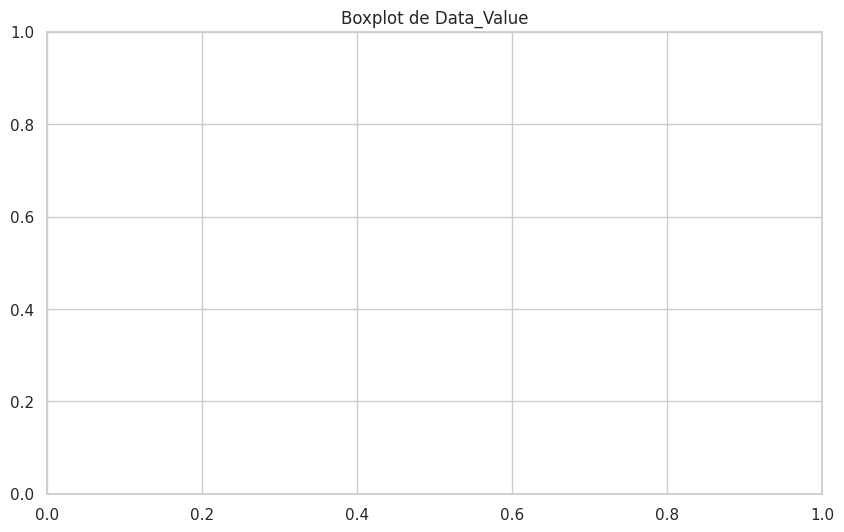

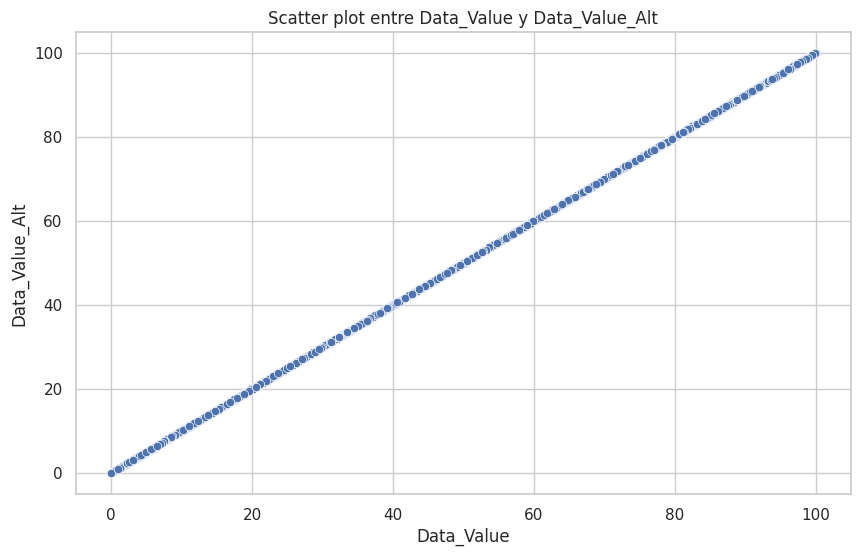

In [76]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(df=df['Data_Value'])
plt.title('Boxplot de Data_Value')
plt.show()

#comparando ando
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Data_Value'], y=df['Data_Value_Alt'])
plt.title('Scatter plot entre Data_Value y Data_Value_Alt')
plt.show()


In [77]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['Data_Value'].quantile(0.25)
Q3 = df['Data_Value'].quantile(0.75)
IQR = Q3 - Q1

# Definir valores atípicos como aquellos que están por debajo de Q1-1.5*IQR o por encima de Q3+1.5*IQR
outliers = df[(df['Data_Value'] < (Q1 - 1.5 * IQR)) | (df['Data_Value'] > (Q3 + 1.5 * IQR))]
print(f"Número de valores atípicos en 'Data_Value': {len(outliers)}")


Número de valores atípicos en 'Data_Value': 27923


**DIFERENCIA ENTRE LOS DOS METODOS**

*Método del Z-Score*
El Z-score mide la desviación de un valor respecto a la media, en términos de desviaciones estándar. Este método asume que los datos siguen una distribución normal (gaussiana), y los valores atípicos son aquellos que tienen un Z-score (en valor absoluto) que supera un cierto umbral, comúnmente 3. Esto implica que los valores atípicos son aquellos que están muy lejos de la media

*Método del Rango Intercuartílico (IQR)*
El método IQR es robusto frente a valores atípicos y no asume una distribución específica de los datos. Este método calcula los cuartiles (Q1 y Q3), y los valores atípicos se determinan como aquellos que están por fuera de estos límites

Trabajemoss con esto

In [78]:

# Limitar valores atípicos
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
df['Data_Value_Capped'] = df['Data_Value'].clip(lower=lower_limit, upper=upper_limit)


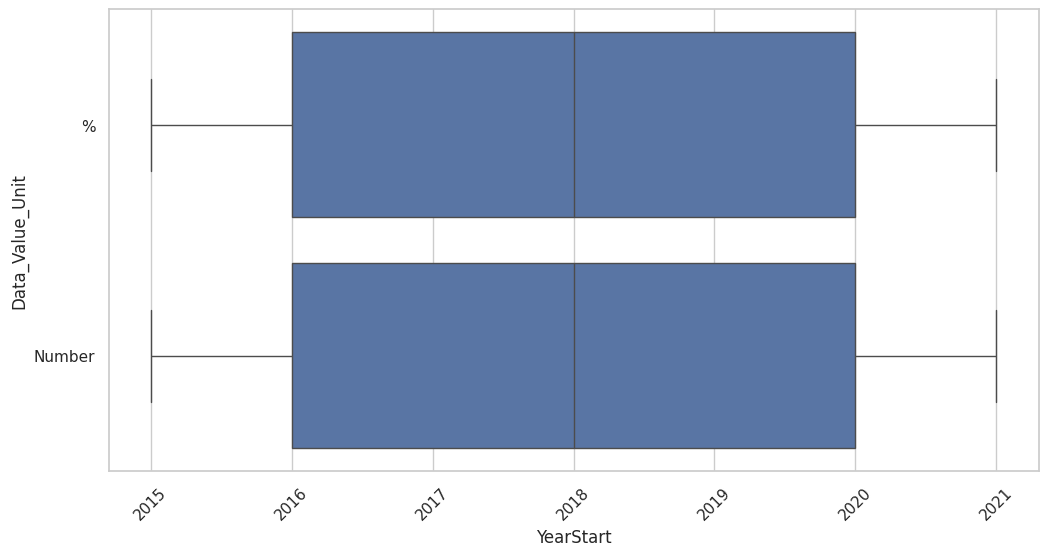

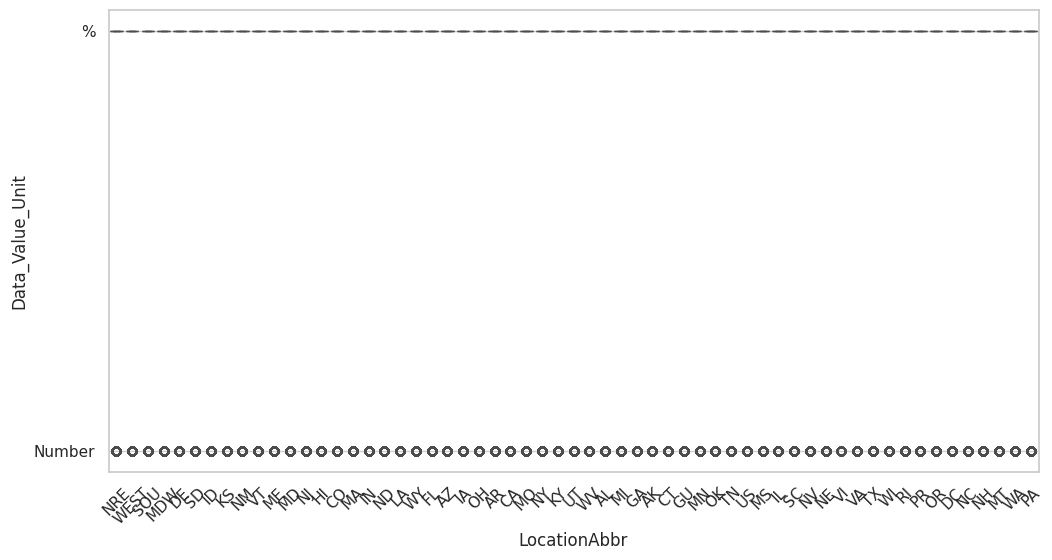

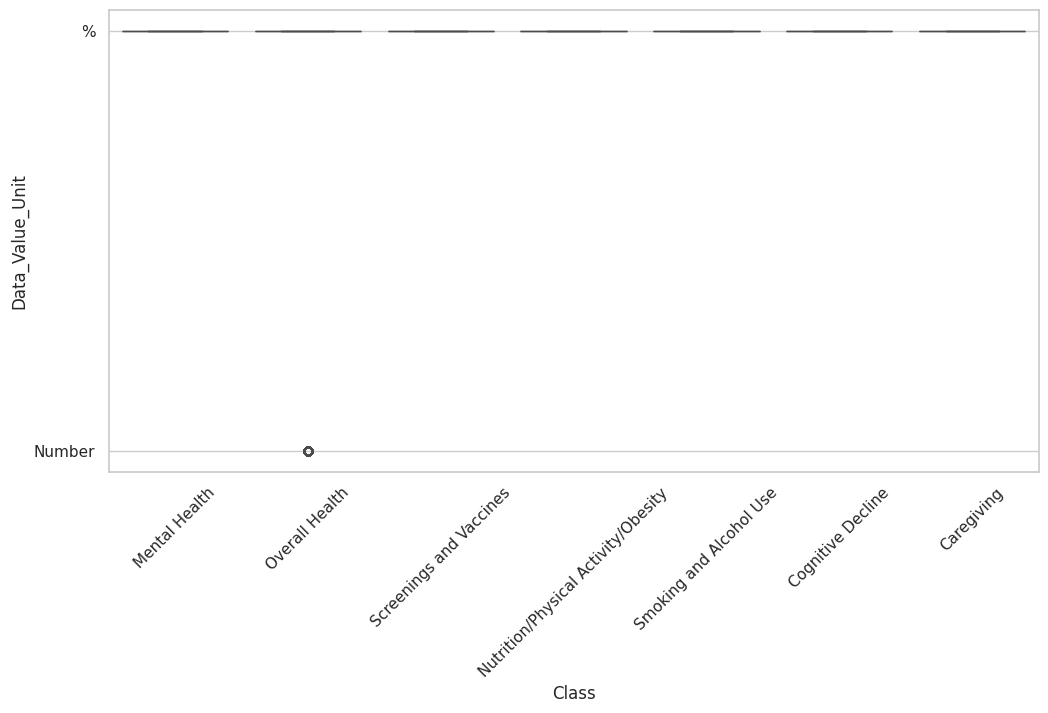

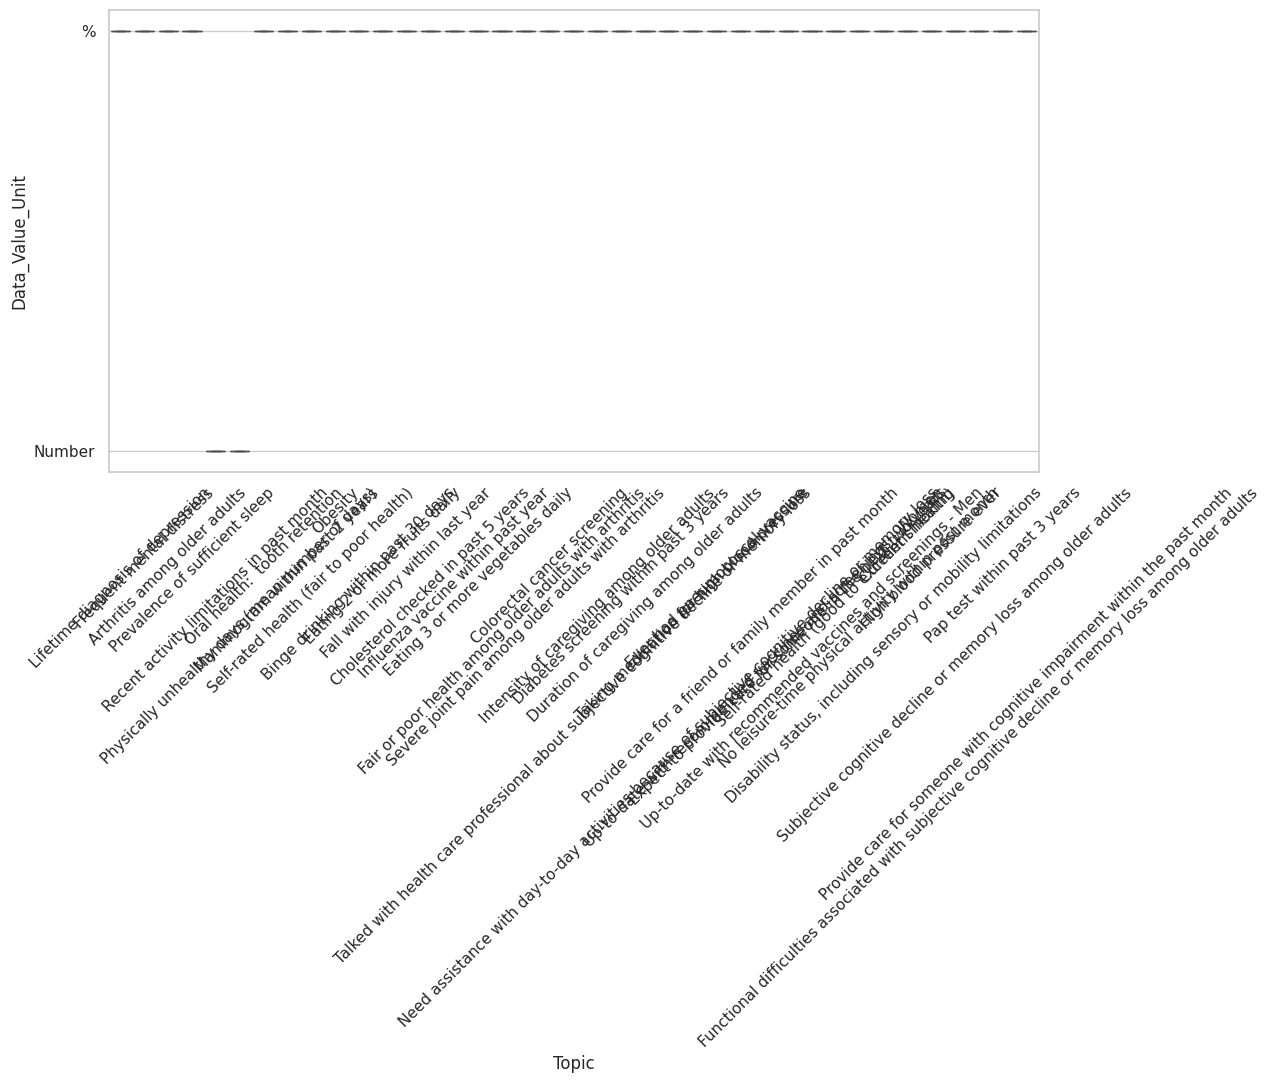

Frecuencia de LocationDesc:
LocationDesc
United States, DC & Territories    5376
West                               5370
Northeast                          5346
Midwest                            5343
Oregon                             5299
South                              5274
New York                           5271
Utah                               4714
Ohio                               4666
Hawaii                             4626
Maryland                           4616
Georgia                            4539
Michigan                           4493
Tennessee                          4446
Texas                              4431
Mississippi                        4381
Maine                              4373
West Virginia                      4318
Wisconsin                          4313
Nevada                             4308
Virginia                           4274
Alabama                            4271
New Mexico                         4265
Kentucky                           4255

In [79]:
# Boxplots para examinar las relaciones entre variables categóricas y continuas
for column in ['YearStart', 'LocationAbbr', 'Class', 'Topic']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, y='Data_Value_Unit', data=df)
    plt.xticks(rotation=45)
    plt.show()

# Conteos de frecuencia para variables categóricas
for column in ['LocationDesc', 'StratificationCategoryID1']:
    print(f"Frecuencia de {column}:")
    print(df[column].value_counts())
    print('\n')

In [80]:
print(df.columns)

Index(['RowId', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
       'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID',
       'LocationID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2', 'Z_Score_Data_Value',
       'Data_Value_Capped'],
      dtype='object')


In [81]:
# Contar el número de valores faltantes por columna
missing_values_count = df.isnull().sum()

# Filtrar y mostrar solo las columnas que tienen valores faltantes
print(missing_values_count[missing_values_count > 0])


Series([], dtype: int64)


In [82]:
df['LocationDesc_encoded'] = df['LocationDesc'].astype('category').cat.codes

In [83]:
df.to_csv('data_final.csv', index=False)